In [2]:
from orbit.utils.dataset import load_iclaims
from orbit.eda import eda_plot
import orbit.constants.palette as palette

import seaborn as sns
import pandas as pd

import numpy as np
from orbit.models import LGT, DLT
import arviz as az
from orbit.diagnostics.plot import plot_predicted_data
from orbit.utils.plot import get_orbit_style

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from matplotlib import rc

# Orbit Signature Palette and Plot Style  

Oribt provides a set of qualitative, sequential and divering palettes to choose from, and a unique Orbit signature plotting style to create unique and visually pleasing charts. 

To use for Orbit Palette 

import orbit.constants.palette as palette
 
specify choice of colors for example: palette.OrbitColorMap.BLUE_GRADIENT.value

Users have the option to use Orbit style for the entire notebook or just for individual plotting functions: 

1. use Orbit plotting style for the entire notebook: this WILL overwrite user's style or default style for the entire notebook

    orbit_style = get_orbit_style()
    
    plt.style.use(orbit_style)
    
2. only use Orbit plotting style for Orbit plotting functions: this will NOT impact user's style or default style for the entire notebook 

    user to specify whether to use orbit style for individual functions (default use_orbit_style=True). Please see examples below
    


In [5]:
raw_df = load_iclaims()
raw_df.dtypes

week              datetime64[ns]
claims                   float64
trend.unemploy           float64
trend.filling            float64
trend.job                float64
sp500                    float64
vix                      float64
dtype: object

In [6]:
df = raw_df.copy()

In [7]:
df.head()

,week,claims,trend.unemploy,trend.filling,trend.job,sp500,vix
0,2010-01-03,13.386595,0.219882,-0.318452,0.117500,-0.417633,0.122654
1,2010-01-10,13.624218,0.219882,-0.194838,0.168794,-0.425480,0.110445
2,2010-01-17,13.398741,0.236143,-0.292477,0.117500,-0.465229,0.532339
3,2010-01-24,13.137549,0.203353,-0.194838,0.106918,-0.481751,0.428645
4,2010-01-31,13.196760,0.134360,-0.242466,0.074483,-0.488929,0.487404


In [8]:
test_size=52

train_df=df[:-test_size]
test_df=df[-test_size:]

In [9]:
dlt = DLT(response_col='claims',
             date_col='week',
             seasonality=52,
             seed=2020)

In [10]:
dlt.fit(train_df)

2024-01-21 17:25:15 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

In [11]:
predicted_df = dlt.predict(df=df, decompose=True)
predicted_df

,week,prediction_5,prediction,prediction_95,trend_5,trend,trend_95,seasonality_5,seasonality,seasonality_95,regression_5,regression,regression_95
0,2010-01-03,13.280258,13.386934,13.494152,12.971734,13.065477,13.169708,0.285983,0.313343,0.357919,0.0,0.0,0.0
1,2010-01-10,13.505674,13.620594,13.740260,12.959251,13.072118,13.150729,0.454911,0.555630,0.630481,0.0,0.0,0.0
2,2010-01-17,13.239633,13.376727,13.491780,12.982969,13.064959,13.188750,0.197720,0.297731,0.384834,0.0,0.0,0.0
3,2010-01-24,13.001890,13.151968,13.271914,12.938928,13.064210,13.150783,-0.010906,0.080342,0.147278,0.0,0.0,0.0
4,2010-01-31,13.039371,13.182339,13.298785,12.956090,13.070954,13.154630,0.005171,0.107658,0.201739,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,2018-05-27,12.105644,12.232086,12.315658,12.117114,12.257510,12.337148,-0.054384,-0.026241,0.000361,0.0,0.0,0.0
439,2018-06-03,12.040424,12.164513,12.281393,12.125013,12.248700,12.375470,-0.115741,-0.086977,-0.063800,0.0,0.0,0.0
440,2018-06-10,12.123452,12.243904,12.379812,12.103380,12.237064,12.376783,-0.017700,0.008715,0.034552,0.0,0.0,0.0
441,2018-06-17,12.120224,12.222411,12.348094,12.118776,12.241921,12.383204,-0.047615,-0.020991,0.005054,0.0,0.0,0.0


## Use Orbit Style for the Notebook

In [12]:
###### call for orbit style 
# orbit_style = get_orbit_style()   
# plt.style.use(orbit_style)

###### change back to default 
# plt.style.use(default)

## Use Orbit Style for Individual Functions 

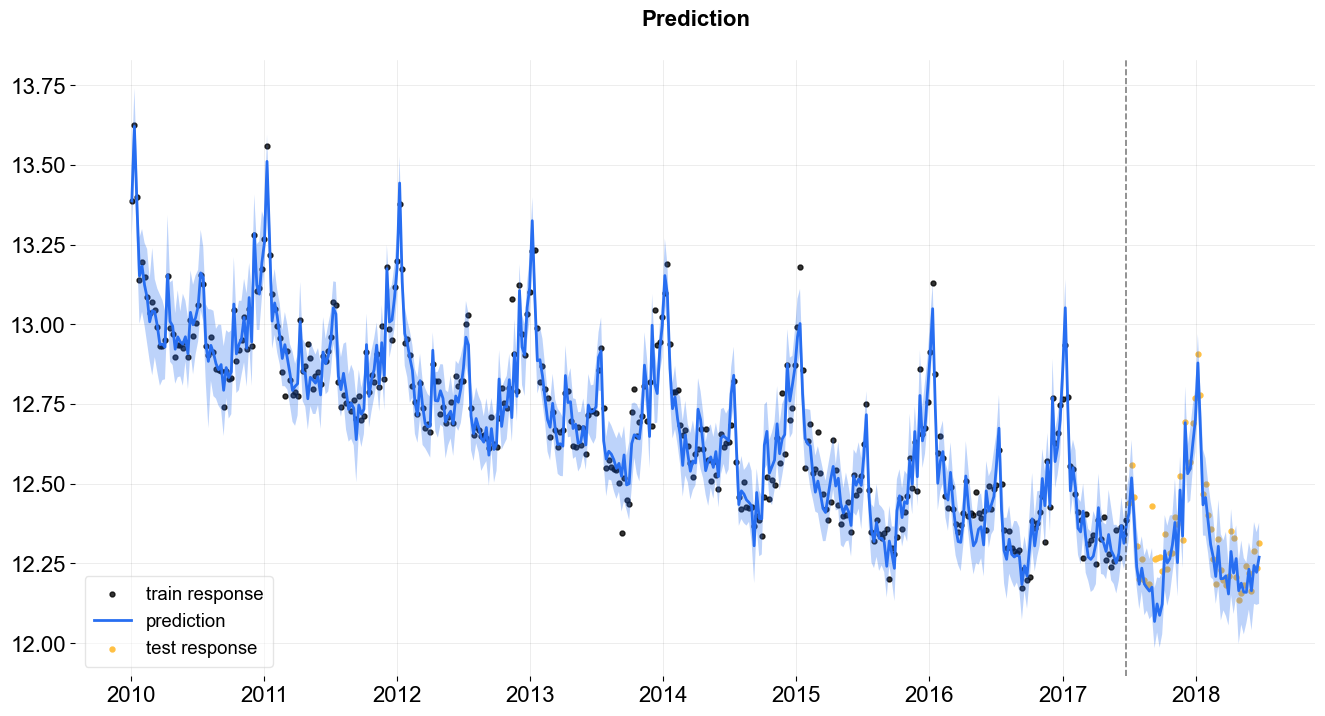

In [13]:
# default using orbit style 
_ = plot_predicted_data(training_actual_df=train_df,
                        predicted_df=predicted_df,
                        title='Prediction',
                        date_col='week',
                        actual_col='claims',
                        test_actual_df=test_df)

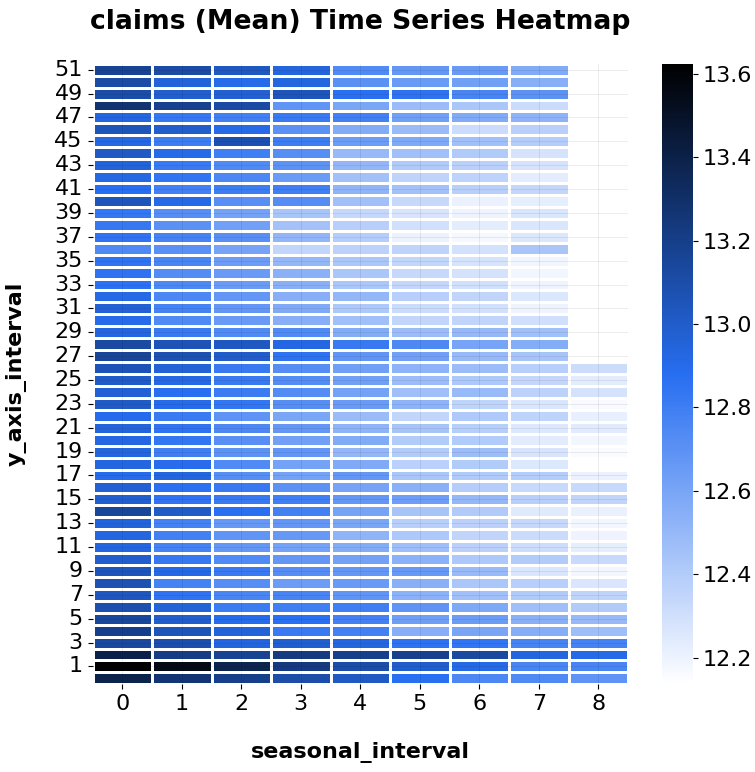

In [17]:
# specify to use orbit style

_ = eda_plot.ts_heatmap(df = df, date_col = 'week', value_col='claims', 
                        palette = palette.OrbitColorMap.BLUE_GRADIENT.value, 
                        seasonal_interval=52,
                        use_orbit_style=True)

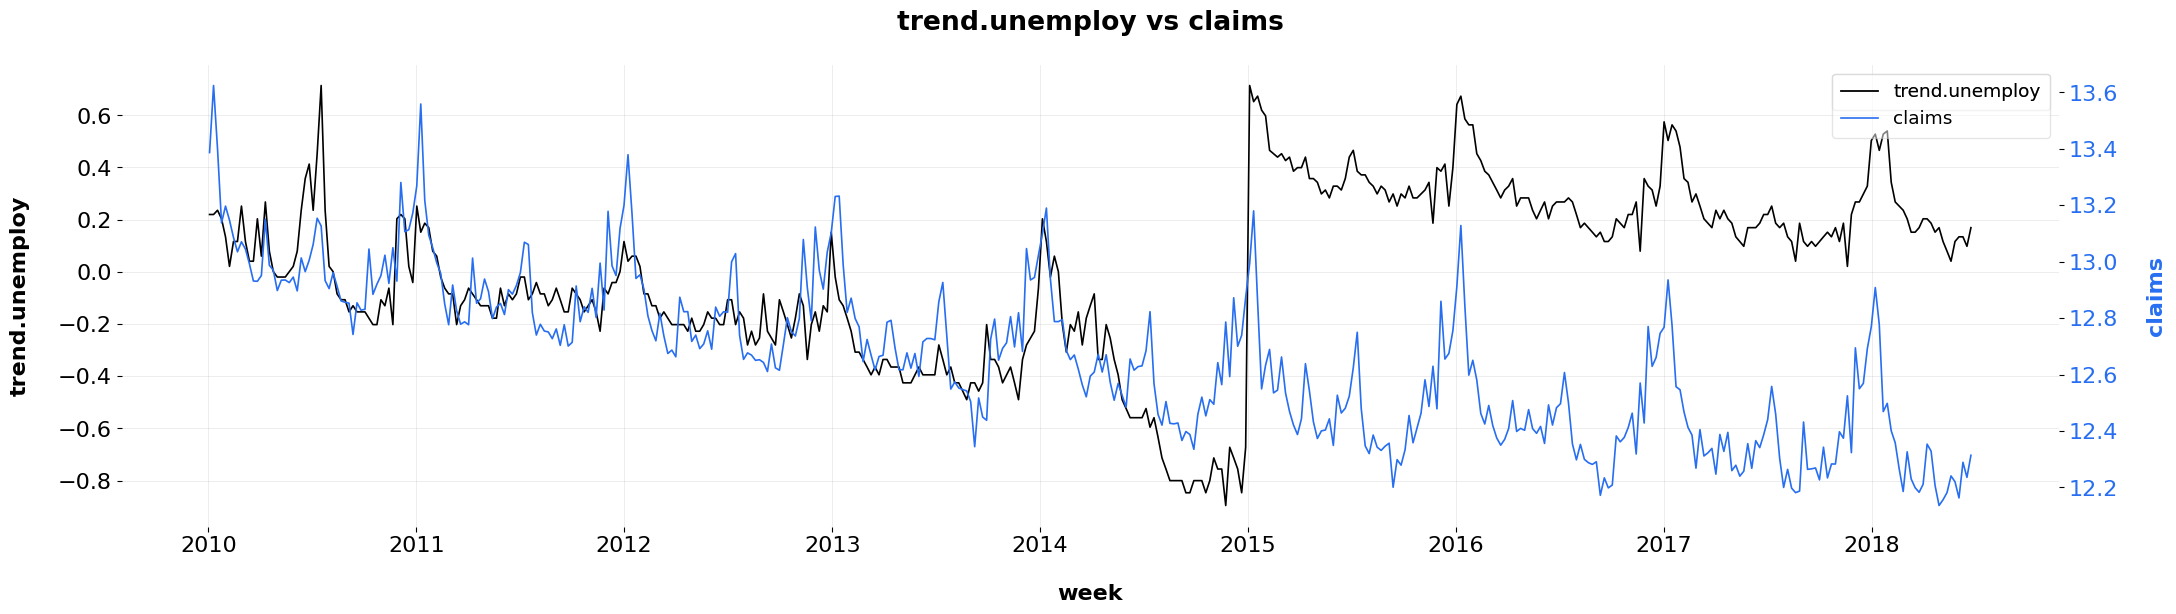

In [18]:
# use orbit style and orbit palette
_ = eda_plot.dual_axis_ts_plot(df=df, var1='trend.unemploy', var2='claims', date_col='week')

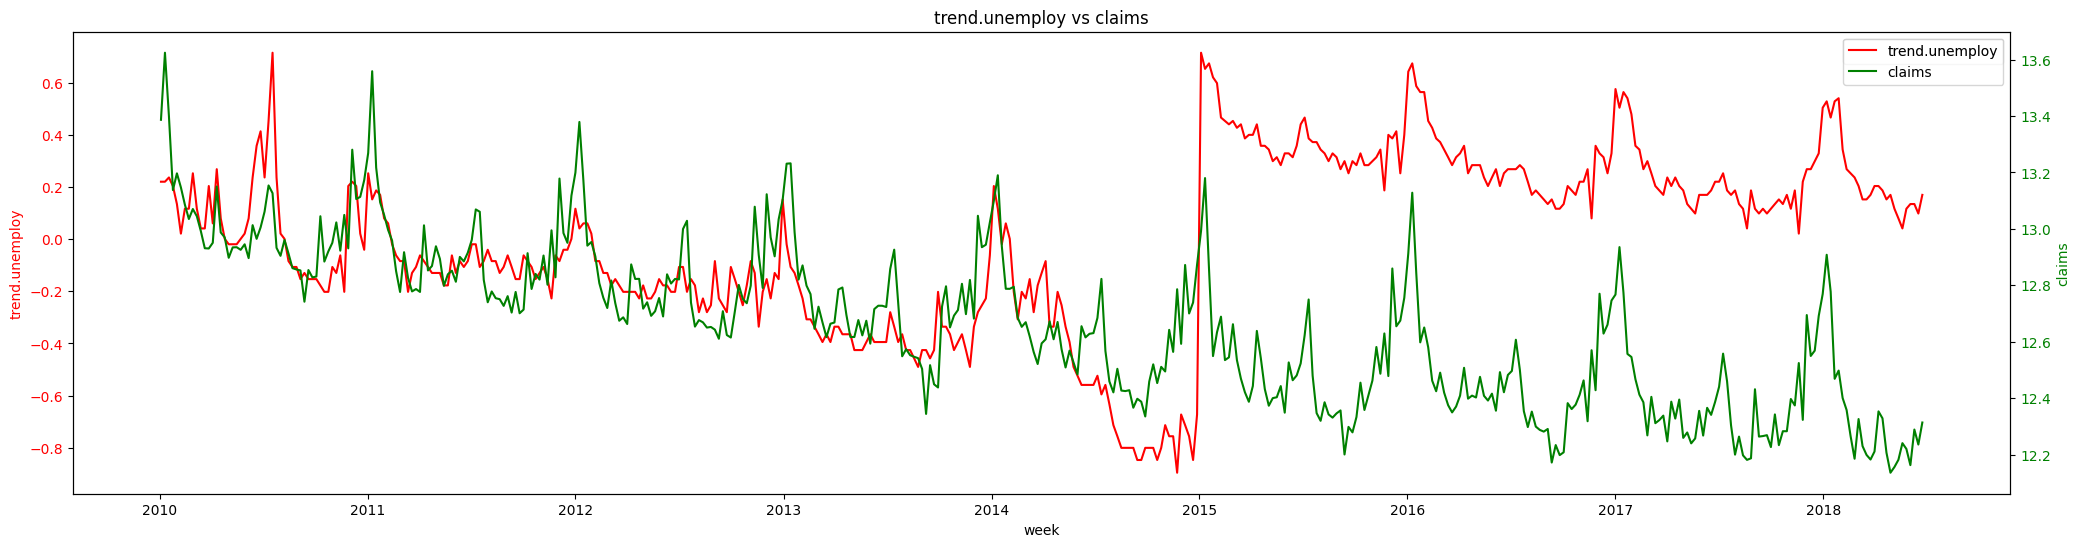

In [19]:
# use customize style and customized palette
_ = eda_plot.dual_axis_ts_plot(df=df, var1='trend.unemploy', var2='claims', date_col='week', color1='red', color2='green',
                               use_orbit_style=False)